In [1]:
# read merged diag files for plotting
# initial built: 2025/02/07

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [2]:
#exps = ['sc_CTRL', 'sc_amsua_ch3']
#exps = ['sc_CTRL', 'sc_full_clr_cld']
#exps = ['sc_CTRL', 'sc_multichannel']
exps = ['sc_CTRL', 'sc_full_clr_cld', 'sc_full_clr_cld_low', 'sc_full_sym_clwnbc', 'sc_full_sym_tri_clwnbc']

instr='amsua'
#instr='atms'
sat='n15'
#sat='n20'
#time='2022070106'
time='2022062506'

output_root = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/compile_radstats/pkl_files_multi_exp'
output_fn   = f"{instr}_{sat}_gesanl_{time}_{'-'.join(exps)}.pkl"

# Reading a pickle file
df = pd.read_pickle(f"{output_root}/{output_fn}")

In [75]:
df.keys()

Index(['channel', 'lon', 'lat', 'fwater', 'obs', 'clw_obs', 'qc_sc_CTRL_ges',
       'omf_sc_CTRL_ges', 'omfnbc_sc_CTRL_ges', 'clw_model_sc_CTRL_ges',
       'clw_sym_sc_CTRL_ges', 'inv_obserr_sc_CTRL_ges', 'omfnorm_sc_CTRL_ges',
       'varbc_idx_sc_CTRL_ges', 'inner_pres_sc_CTRL_ges',
       'inner_t_sc_CTRL_ges', 'inner_qv_sc_CTRL_ges', 'inner_ql_sc_CTRL_ges',
       'jac_t_sc_CTRL_ges', 'jac_qv_sc_CTRL_ges', 'jac_ql_sc_CTRL_ges',
       'qc_sc_CTRL_anl', 'omf_sc_CTRL_anl', 'omfnbc_sc_CTRL_anl',
       'clw_model_sc_CTRL_anl', 'clw_sym_sc_CTRL_anl',
       'inv_obserr_sc_CTRL_anl', 'omfnorm_sc_CTRL_anl',
       'varbc_idx_sc_CTRL_anl', 'inner_pres_sc_CTRL_anl',
       'inner_t_sc_CTRL_anl', 'inner_qv_sc_CTRL_anl', 'inner_ql_sc_CTRL_anl',
       'jac_t_sc_CTRL_anl', 'jac_qv_sc_CTRL_anl', 'jac_ql_sc_CTRL_anl',
       'qc_sc_full_clr_cld_ges', 'omf_sc_full_clr_cld_ges',
       'omfnbc_sc_full_clr_cld_ges', 'clw_model_sc_full_clr_cld_ges',
       'clw_sym_sc_full_clr_cld_ges', 'inv_obse

In [46]:
df_diff = df['clw_sym_sc_amsua_ch1_ges']-df['clw_sym_sc_CTRL_ges']
df_diff.describe()

count    17763.000000
mean         0.001413
std          0.000646
min          0.000000
25%          0.001263
50%          0.001489
75%          0.001750
max          0.002934
dtype: float64

In [4]:
# several useful tips:

# group the rows into "observation data point"
# each data point = an observation at a certain location:
group_df = df.groupby(['lat', 'lon'])

# to see the # of data point:
ndata = len(list(group_df))
print(f'# of data point = {ndata}')

# to check the data frame of a specific data point:
#data_idx = 0
#list(group_df)[data_idx][1]

# to retrieve the data from group_df:
#for key, group in group_df:
#    print(key)
#    print(type(group))

# of data point = 2981


In [ ]:
# Examples:

# Plot the data point distribution:

# retrieve the data point:
latd = []; lond = []; 

for key, group in group_df:
    latd.append(key[0])
    lond.append(key[1])    

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lond, latd, s=5)
#scatter1 = ax.scatter(54.8, -13.6, s=50, color='red')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{chn} {gesanl} {time}')
cbar = fig.colorbar(scatter1,location='right',aspect=40)
#cbar.set_label('dT (K)', fontsize=14)

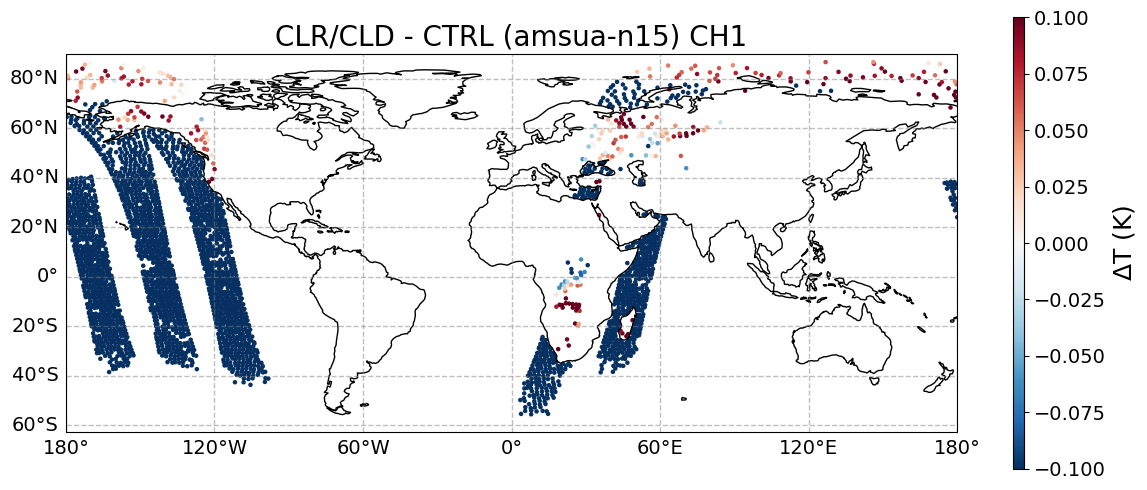

In [3]:
# Examples 
# Plot CH1 omf difference between two experiments' spatial distribution:

plt_ch = 1
exptest = exps[1]
expref  = exps[0]

vmin = -0.1
vmax =  0.1

save_fig = True
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/single_cycle_VarBC_sens_exp/VarBC_inc_map/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


tmpdf = df[df['channel'] == plt_ch]
lond = tmpdf['lon']
latd = tmpdf['lat']
omf_ref  = tmpdf[f'omf_{expref}_ges']
omf_test = tmpdf[f'omf_{exptest}_ges']

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lond, latd, c=omf_ref - omf_test, s=5,  vmin=vmin, vmax=vmax, cmap='RdBu_r')
#scatter2 = ax.scatter(54.8, -13.6, s=50, edgecolor='red', facecolors='none', linewidth=2)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{plt_ch} {time}')
ax.set_title(f'CLR/CLD - CTRL ({instr}-{sat}) CH{plt_ch}',fontsize=20)

cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label(r'$\Delta$T (K)', fontsize=18)
cbar.ax.tick_params(labelsize=14)  # Increase tick label size
plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_dir}/{instr}_{sat}_ch{plt_ch}_{time}_{exptest}_minus_{expref}.png")


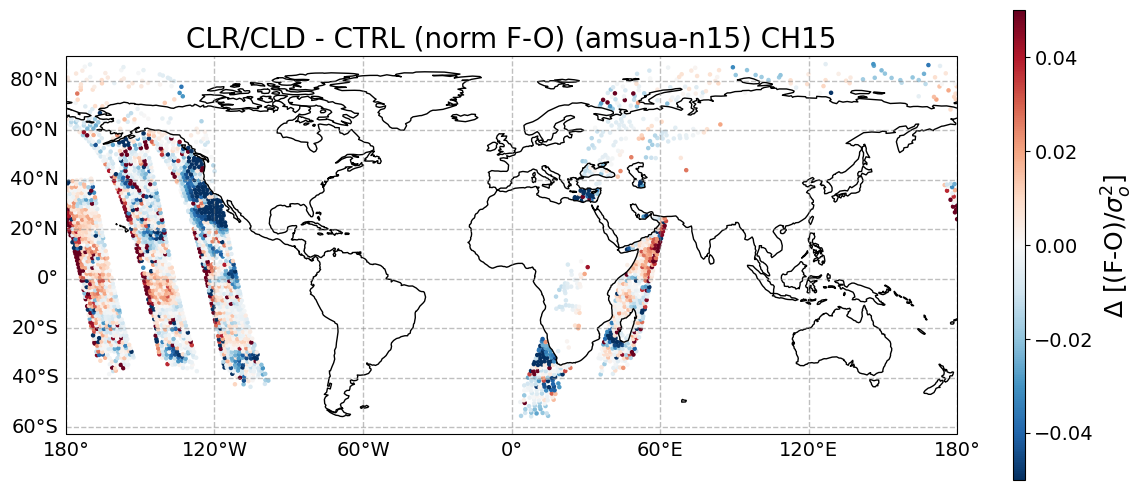

In [42]:
# Examples 
# Plot CH1 omfnorm difference between two experiments' spatial distribution:

plt_ch = 15
exptest = exps[4]
expref  = exps[1]

vmin = -0.05
vmax =  0.05

save_fig = True
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/single_cycle_VarBC_sens_exp/VarBC_norminc_map/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


tmpdf = df[df['channel'] == plt_ch]
lond = tmpdf['lon']
latd = tmpdf['lat']
omfnorm_ref  = tmpdf[f'omfnorm_{expref}_ges']
omfnorm_test = tmpdf[f'omfnorm_{exptest}_ges']

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lond, latd, c=omfnorm_ref - omfnorm_test, s=5,  vmin=vmin, vmax=vmax, cmap='RdBu_r')
#scatter2 = ax.scatter(54.8, -13.6, s=50, edgecolor='red', facecolors='none', linewidth=2)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{plt_ch} {time}')
ax.set_title(f'CLR/CLD - CTRL (norm F-O) ({instr}-{sat}) CH{plt_ch}',fontsize=20)

cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label(r'$\Delta$ [(F-O)/$\sigma_o^2$] ', fontsize=18)
cbar.ax.tick_params(labelsize=14)  # Increase tick label size
plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_dir}/fmonorm_{instr}_{sat}_ch{plt_ch}_{time}_{exptest}_minus_{expref}.png")

In [5]:
# Example:
# Plot the vertical profile of a given observation point:

# filter data criterion (e.g., filter out land):
tmpdf = df[df['fwater']>=0.99]

# group data into observation point:
group_df = tmpdf.groupby(['lat', 'lon'])

In [20]:
# select observation point:
idx = 1250 # the index for the observation point:
obs_pt_df = list(group_df)[idx][1]

In [28]:
obs_pt_df

,channel,lon,lat,fwater,obs,clw_obs,qc_sc_CTRL_ges,omf_sc_CTRL_ges,omfnbc_sc_CTRL_ges,clw_model_sc_CTRL_ges,...,inv_obserr_sc_full_sym_tri_clwnbc_anl,omfnorm_sc_full_sym_tri_clwnbc_anl,varbc_idx_sc_full_sym_tri_clwnbc_anl,inner_pres_sc_full_sym_tri_clwnbc_anl,inner_t_sc_full_sym_tri_clwnbc_anl,inner_qv_sc_full_sym_tri_clwnbc_anl,inner_ql_sc_full_sym_tri_clwnbc_anl,jac_t_sc_full_sym_tri_clwnbc_anl,jac_qv_sc_full_sym_tri_clwnbc_anl,jac_ql_sc_full_sym_tri_clwnbc_anl
5594,1,188.455307,-0.8014,1.0,209.970001,0.048858,0.0,2.697567,5.934751,0.028103,...,0.310400,0.199290,1.0,"[0.17350132763385773, 0.5105040073394775, 0.84...","[256.0173645019531, 256.0173645019531, 256.017...","[0.002768333535641432, 0.002768333535641432, 0...","[1.000999986899842e-06, 1.000999986899842e-06,...","[1.192899071611464e-05, 4.145723778492538e-06,...","[0.00010142154496861622, 0.0001213955401908606...","[24.15108299255371, 24.15108299255371, 24.1510..."
5595,2,188.455307,-0.8014,1.0,180.039993,0.048858,0.0,2.399429,2.964984,0.028103,...,0.292357,0.155481,1.0,"[0.17350132763385773, 0.5105040073394775, 0.84...","[256.0173645019531, 256.0173645019531, 256.017...","[0.002768333535641432, 0.002768333535641432, 0...","[1.000999986899842e-06, 1.000999986899842e-06,...","[2.3960274120327085e-05, 8.261184120783582e-06...","[2.712071989208198e-07, 8.81109428974014e-07, ...","[57.257564544677734, 57.257564544677734, 57.25..."
5596,4,188.455307,-0.8014,1.0,265.579987,0.048858,0.0,0.170801,0.008669,0.028103,...,2.178414,0.713990,1.0,"[0.17350132763385773, 0.5105040073394775, 0.84...","[256.0173645019531, 256.0173645019531, 256.017...","[0.002768333535641432, 0.002768333535641432, 0...","[1.000999986899842e-06, 1.000999986899842e-06,...","[-5.211955340200802e-06, -4.1325014876747446e-...","[2.2443331545218825e-05, 2.5942477805074304e-0...","[-2.4544224739074707, -2.4544224739074707, -2...."
5597,5,188.455307,-0.8014,1.0,256.899994,0.048858,0.0,-0.195148,-0.338741,0.028103,...,4.795722,-4.615452,1.0,"[0.17350132763385773, 0.5105040073394775, 0.84...","[256.0173645019531, 256.0173645019531, 256.017...","[0.002768333535641432, 0.002768333535641432, 0...","[1.000999986899842e-06, 1.000999986899842e-06,...","[9.894973482005298e-05, 4.3258834921289235e-05...","[4.423025529831648e-05, 5.112030339660123e-05,...","[-0.35663554072380066, -0.35663554072380066, -..."
5598,15,188.455307,-0.8014,1.0,262.950012,0.048858,0.0,6.654593,7.889736,0.028103,...,0.229717,0.312736,1.0,"[0.17350132763385773, 0.5105040073394775, 0.84...","[256.0173645019531, 256.0173645019531, 256.017...","[0.002768333535641432, 0.002768333535641432, 0...","[1.000999986899842e-06, 1.000999986899842e-06,...","[1.9221508409827948e-05, 8.062458618951496e-06...","[2.082318815155304e-07, 6.767145919184259e-07,...","[45.816307067871094, 45.816307067871094, 45.81..."


In [176]:
obs_pt_df.keys()

Index(['channel', 'lon', 'lat', 'fwater', 'obs', 'clw_obs', 'qc_sc_CTRL_ges',
       'omf_sc_CTRL_ges', 'omfnbc_sc_CTRL_ges', 'clw_model_sc_CTRL_ges',
       'clw_sym_sc_CTRL_ges', 'inv_obserr_sc_CTRL_ges',
       'varbc_idx_sc_CTRL_ges', 'inner_pres_sc_CTRL_ges',
       'inner_t_sc_CTRL_ges', 'inner_qv_sc_CTRL_ges', 'inner_ql_sc_CTRL_ges',
       'jac_t_sc_CTRL_ges', 'jac_qv_sc_CTRL_ges', 'jac_ql_sc_CTRL_ges',
       'qc_sc_CTRL_anl', 'omf_sc_CTRL_anl', 'omfnbc_sc_CTRL_anl',
       'clw_model_sc_CTRL_anl', 'clw_sym_sc_CTRL_anl',
       'inv_obserr_sc_CTRL_anl', 'varbc_idx_sc_CTRL_anl',
       'inner_pres_sc_CTRL_anl', 'inner_t_sc_CTRL_anl', 'inner_qv_sc_CTRL_anl',
       'inner_ql_sc_CTRL_anl', 'jac_t_sc_CTRL_anl', 'jac_qv_sc_CTRL_anl',
       'jac_ql_sc_CTRL_anl', 'qc_sc_multichannel_ges',
       'omf_sc_multichannel_ges', 'omfnbc_sc_multichannel_ges',
       'clw_model_sc_multichannel_ges', 'clw_sym_sc_multichannel_ges',
       'inv_obserr_sc_multichannel_ges', 'varbc_idx_sc_multich

In [21]:
# select which channel to plot
test_ch = 1
obs_pt_ch_df = obs_pt_df[obs_pt_df['channel'] == test_ch]

lat = obs_pt_ch_df['lat'].values[0]
lon = obs_pt_ch_df['lon'].values[0]
fwater = obs_pt_ch_df['fwater'].values[0]
clw_obs   = obs_pt_ch_df['clw_obs'].values[0]
clw_model = obs_pt_ch_df[f'clw_model_{exps[0]}_ges'].values[0]

qv_ges = {};
qv_anl = {};
t_ges  = {};
t_anl  = {};
omf_ges = {};
omf_anl = {};
omfnorm_ges = {};
omfnorm_anl = {};
jac_qv_ges = {};
jac_qv_anl = {};
jac_t_ges  = {};
jac_t_anl  = {};

for exp in exps:
    pres = np.array(obs_pt_ch_df[f"inner_pres_{exp}_ges"].values[0]) # should be the same across all experiments
    qv_ges[exp] = np.array(obs_pt_ch_df[f'inner_qv_{exp}_ges'].values[0])
    qv_anl[exp] = np.array(obs_pt_ch_df[f'inner_qv_{exp}_anl'].values[0])
    t_ges[exp]  = np.array(obs_pt_ch_df[f'inner_t_{exp}_ges'].values[0])
    t_anl[exp]  = np.array(obs_pt_ch_df[f'inner_t_{exp}_anl'].values[0])
    omf_ges[exp] = np.array(obs_pt_df[f'omf_{exp}_ges'].values)
    omf_anl[exp] = np.array(obs_pt_df[f'omf_{exp}_anl'].values)
    omfnorm_ges[exp] = np.array(obs_pt_df[f'omf_{exp}_ges'].values)*(np.array(obs_pt_df[f'inv_obserr_{exp}_ges'].values)**2)
    omfnorm_anl[exp] = np.array(obs_pt_df[f'omf_{exp}_anl'].values)*(np.array(obs_pt_df[f'inv_obserr_{exp}_anl'].values)**2)    
    jac_qv_ges[exp] = np.array(obs_pt_df[f'jac_qv_{exp}_ges'].values)
    jac_qv_anl[exp] = np.array(obs_pt_df[f'jac_qv_{exp}_ges'].values)
    jac_t_ges[exp] = np.array(obs_pt_df[f'jac_t_{exp}_ges'].values)
    jac_t_anl[exp] = np.array(obs_pt_df[f'jac_t_{exp}_ges'].values)

In [33]:
exps

['sc_CTRL',
 'sc_full_clr_cld',
 'sc_full_clr_cld_low',
 'sc_full_sym_clwnbc',
 'sc_full_sym_tri_clwnbc']

In [34]:
expref  = exps[1]
exptest = exps[4]
#chs = ['ch1','ch2','ch3','ch4','ch5','ch15']
chs = ['ch1','ch2','ch4','ch5','ch15']


In [27]:
jac_qv_ges[expref].shape

(5,)

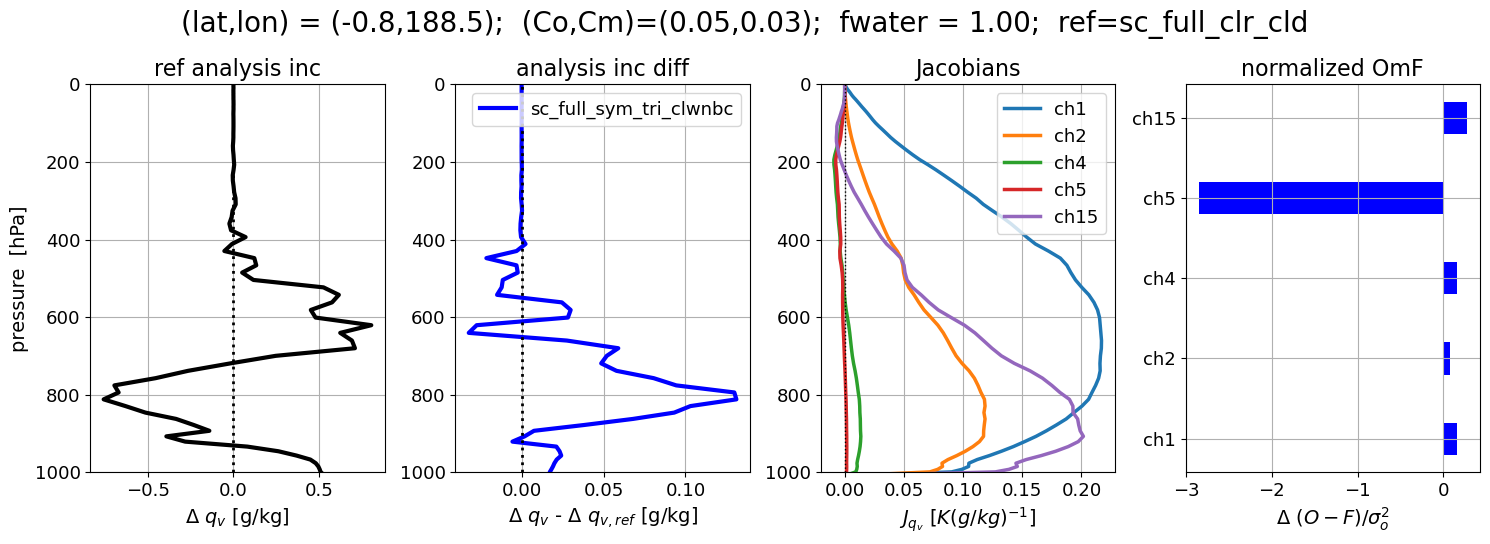

In [35]:
# profile analysis summary (humidity):


fig = plt.figure(figsize=(15,5.5))

# define the subplots
ax1 = fig.add_subplot(1, 4, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 4, 2)  # Add subplot at position 2
ax3 = fig.add_subplot(1, 4, 3)  # Add subplot at position 3
ax4 = fig.add_subplot(1, 4, 4)  # Add subplot at position 4

# ax1: reference analysis increment
ax1.plot(qv_anl[expref] - qv_ges[expref], pres, linewidth=3, label=rf'$\Delta$ qv ({expref})', color='black', linestyle='-')
ax1.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax1.set_ylim(1000,0)
ax1.set_xlabel(r'$\Delta$ $q_v$ [g/kg]', fontsize=14)
ax1.set_ylabel('pressure  [hPa]', fontsize=14)
ax1.grid(True)
#ax1.legend(fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_title('ref analysis inc', fontsize=16)

# ax2: differences in analysis increment
ax2.plot(qv_anl[exptest] - qv_anl[expref], pres, color='blue', linewidth=3, label=rf'{exptest}')
ax2.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax2.set_ylim(1000,0)
#ax2.set_xlim([-0.1,0.1])
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
#ax2.set_ylabel('pressure  [hPa]', fontsize=14)
ax2.set_xlabel(r"$\Delta$ $q_v$ - $\Delta$ $q_{v,ref}$ [g/kg]", fontsize=14)
ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.legend(fontsize=13, loc='upper right')
ax2.set_title('analysis inc diff', fontsize=16)


# ax3: Jacobians
for c, ch in enumerate(chs):
    ax3.plot(jac_qv_ges[expref][c], pres, linewidth=2.5, label=f"{ch}")
ax3.axvline(x=0, color='black', linestyle=':', linewidth=1)
ax3.set_ylim(1000,0)
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
#ax3.set_ylabel('pressure  [hPa]', fontsize=14)
ax3.set_xlabel(rf"$ J_{{q_v}}$ $[K (g/kg)^{{-1}}] $", fontsize=14)
ax3.grid(True)
ax3.tick_params(axis='both', which='major', labelsize=13)
ax3.legend(fontsize=13, loc='best')
ax3.set_title('Jacobians', fontsize=16)

# ax4: channel infos:
bar_height = 0.4

ax4.barh(chs, omfnorm_ges[exptest]-omfnorm_ges[expref],  height=bar_height, label=f'{exptest}-{expref}', color='blue')
ax4.set_xlabel(r'$\Delta$ $(O-F)/ \sigma_o^2$', fontsize=14)
ax4.set_yticks([r for r in range(len(chs))], chs, fontsize=14)
#ax4.yaxis.tick_right()
ax4.tick_params(axis='both', which='major', labelsize=13)
#ax4.set_xlim([-0.04,0.04])
ax4.grid(True)
#ax4.legend(fontsize=13)
ax4.set_title('normalized OmF', fontsize=16)

fig.suptitle(f'(lat,lon) = ({lat:.1f},{lon:.1f});  (Co,Cm)=({clw_obs:.2f},{clw_model:.2f});  fwater = {fwater:.2f};  ref={expref}', fontsize=20)
plt.tight_layout()

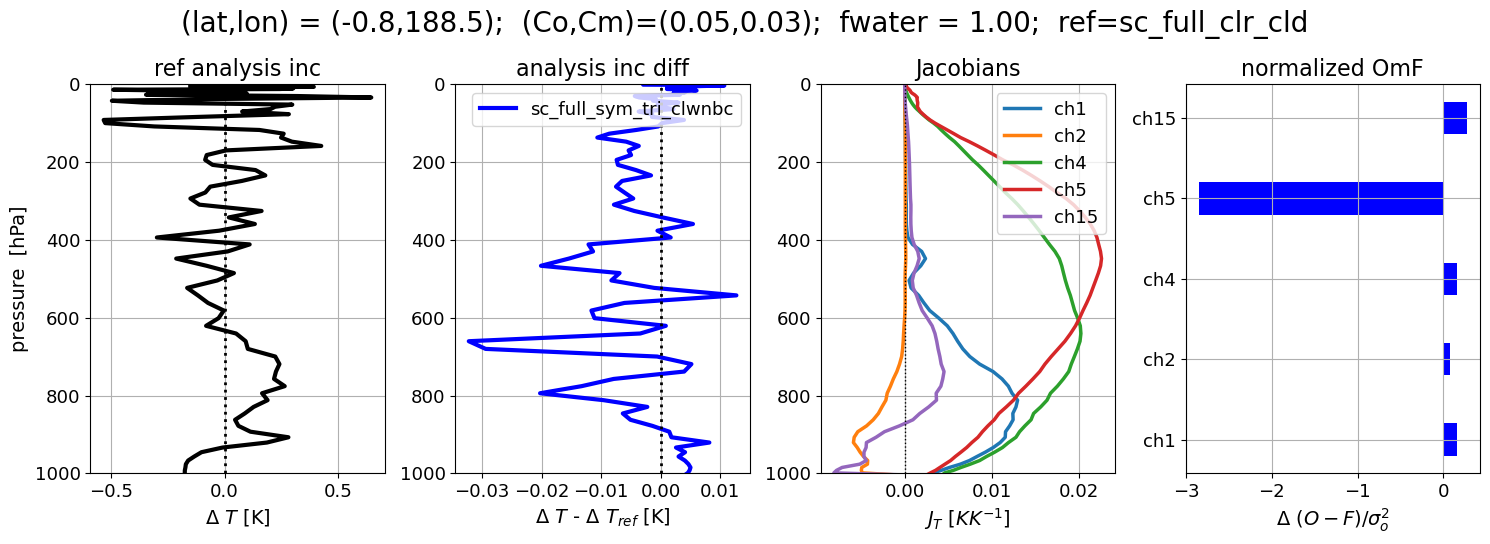

In [36]:
# profile analysis summary (temperautre):


fig = plt.figure(figsize=(15,5.5))

# define the subplots
ax1 = fig.add_subplot(1, 4, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 4, 2)  # Add subplot at position 2
ax3 = fig.add_subplot(1, 4, 3)  # Add subplot at position 3
ax4 = fig.add_subplot(1, 4, 4)  # Add subplot at position 4

# ax1: reference analysis increment
ax1.plot(t_anl[expref] - t_ges[expref], pres, linewidth=3, label=rf'$\Delta$ T ({expref})', color='black', linestyle='-')
ax1.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax1.set_ylim(1000,0)
ax1.set_xlabel(r'$\Delta$ $T$ [K]', fontsize=14)
ax1.set_ylabel('pressure  [hPa]', fontsize=14)
ax1.grid(True)
#ax1.legend(fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_title('ref analysis inc', fontsize=16)

# ax2: differences in analysis increment
ax2.plot(t_anl[exptest] - t_anl[expref], pres, color='blue', linewidth=3, label=rf'{exptest}')
ax2.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax2.set_ylim(1000,0)
#ax2.set_xlim([-0.1, 0.1])
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
#ax2.set_ylabel('pressure  [hPa]', fontsize=14)
ax2.set_xlabel(r"$\Delta$ $T$ - $\Delta$ $T_{ref}$ [K]", fontsize=14)
ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.legend(fontsize=13, loc='upper right')
ax2.set_title('analysis inc diff', fontsize=16)


# ax3: Jacobians
for c, ch in enumerate(chs):
    ax3.plot(jac_t_ges[expref][c], pres, linewidth=2.5, label=f"{ch}")
ax3.axvline(x=0, color='black', linestyle=':', linewidth=1)
ax3.set_ylim(1000,0)
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
#ax3.set_ylabel('pressure  [hPa]', fontsize=14)
ax3.set_xlabel(rf"$ J_{{T}}$ $[K K^{{-1}}] $", fontsize=14)
ax3.grid(True)
ax3.tick_params(axis='both', which='major', labelsize=13)
ax3.legend(fontsize=13, loc='best')
ax3.set_title('Jacobians', fontsize=16)

# ax4: channel infos:
bar_height = 0.4

ax4.barh(chs, omfnorm_ges[exptest]-omfnorm_ges[expref],  height=bar_height, label=f'{exptest}-{expref}', color='blue')
ax4.set_xlabel(r'$\Delta$ $(O-F)/ \sigma_o^2$', fontsize=14)
ax4.set_yticks([r for r in range(len(chs))], chs, fontsize=14)
#ax4.yaxis.tick_right()
ax4.tick_params(axis='both', which='major', labelsize=13)
#ax4.set_xlim([-0.04,0.04])
ax4.grid(True)
#ax4.legend(fontsize=13)
ax4.set_title('normalized OmF', fontsize=16)

fig.suptitle(f'(lat,lon) = ({lat:.1f},{lon:.1f});  (Co,Cm)=({clw_obs:.2f},{clw_model:.2f});  fwater = {fwater:.2f};  ref={expref}', fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'lat = 22.7, lon = 221.7, fwater = 1.00')

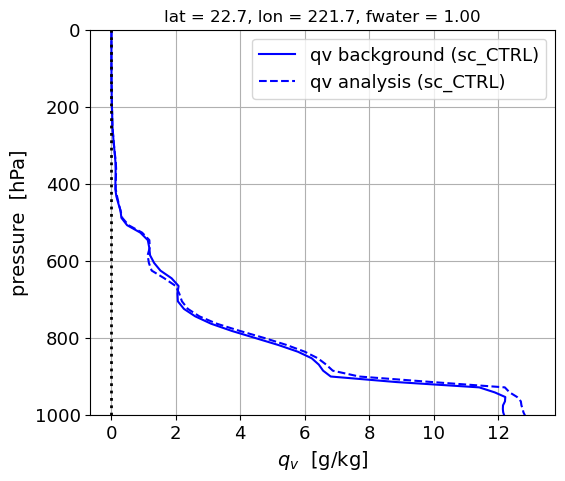

In [24]:
# Plot the background and analysis profile:

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(qv_ges[expref], pres, label=f'qv background ({expref})', color='blue', linestyle='-')
ax.plot(qv_anl[expref], pres, label=f'qv analysis ({expref})', color='blue', linestyle='--')

ax.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax.set_ylim(1000,0)
ax.set_xlabel(r'$q_v $  [g/kg]', fontsize=14)
ax.set_ylabel('pressure  [hPa]', fontsize=14)
ax.grid(True)
ax.legend(fontsize=13)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

Text(0.5, 1.0, 'lat = 22.7, lon = 221.7, fwater = 1.00')

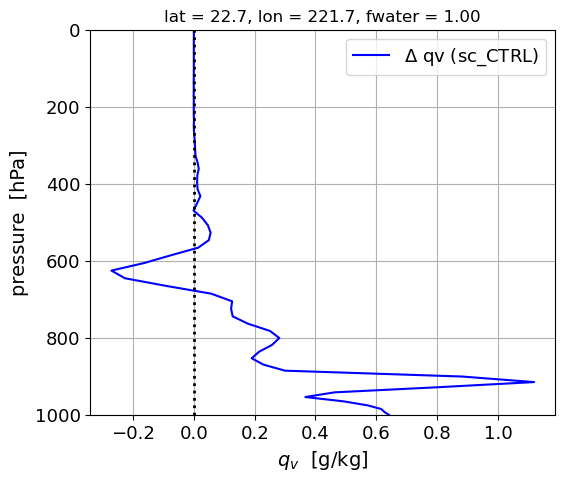

In [25]:
# Plot the analysis increment:

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(qv_anl[expref] - qv_ges[expref], pres,   label=rf'$\Delta$ qv ({expref})', color='blue', linestyle='-')

ax.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax.set_ylim(1000,0)
ax.set_xlabel(r'$q_v $  [g/kg]', fontsize=14)
ax.set_ylabel('pressure  [hPa]', fontsize=14)
ax.grid(True)
ax.legend(fontsize=13)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

Text(0.5, 1.0, 'lat = 22.7, lon = 221.7, fwater = 1.00')

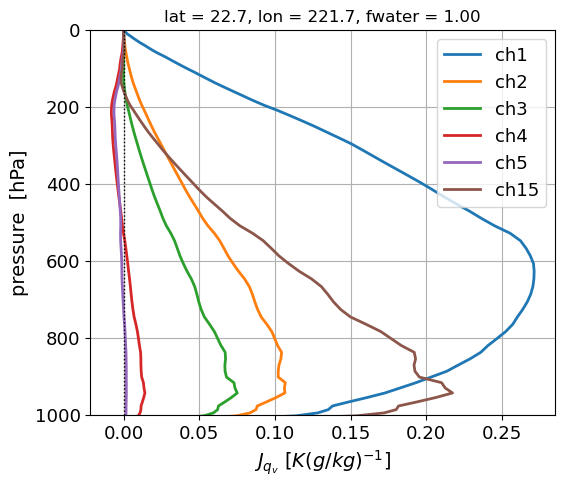

In [26]:
# plot the qv Jacobian:
chs = ['ch1','ch2','ch3','ch4','ch5','ch15']

fig, ax = plt.subplots(figsize=(6,5))
for c, ch in enumerate(chs):
    ax.plot(jac_qv_ges[expref][c], pres, linewidth=2, label=f"{ch}")
ax.axvline(x=0, color='black', linestyle=':', linewidth=1)
ax.set_ylim(1000,0)
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
ax.set_ylabel('pressure  [hPa]', fontsize=14)
ax.set_xlabel(rf"$ J_{{q_v}}$ $[K (g/kg)^{{-1}}] $", fontsize=14)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(fontsize=13)
ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')


Text(0.5, 1.0, 'lat = 22.7, lon = 221.7, fwater = 1.00')

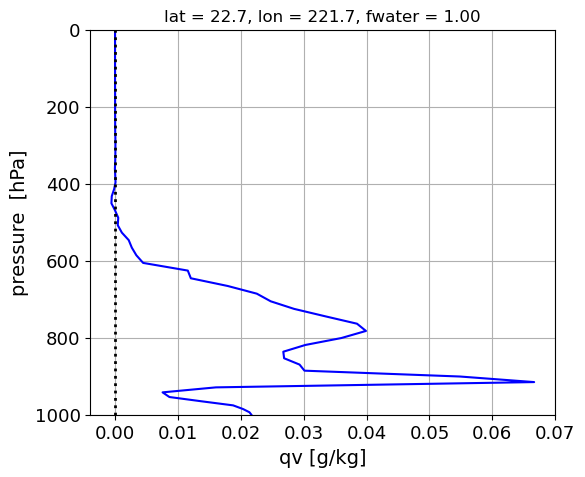

In [29]:
# plot the differences in analysis increment

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(qv_anl[exptest] - qv_anl[expref], pres, color='blue', label=rf'$\Delta q_v$ ({exptest} - {expref})')
ax.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax.set_ylim(1000,0)
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
ax.set_ylabel('pressure  [hPa]', fontsize=14)
ax.set_xlabel('qv [g/kg]', fontsize=14)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=13)
#ax.legend(fontsize=13, loc='best')
ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

Text(0.5, 1.0, 'lat = 22.7, lon = 221.7, fwater = 1.00')

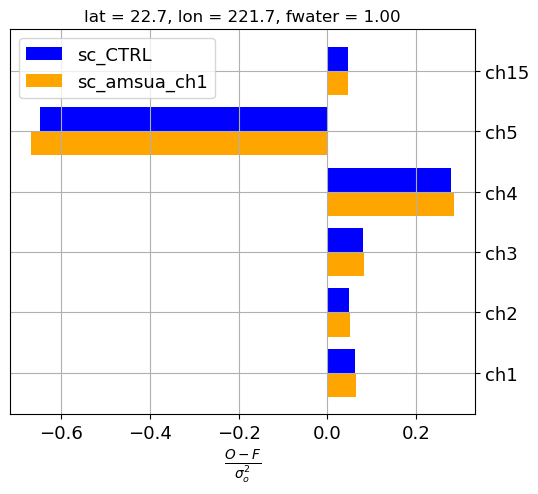

In [41]:
# Plot the background channel information 

fig, ax = plt.subplots(figsize=(6,5))

chs = ['ch1','ch2','ch3','ch4','ch5','ch15']

# Bar width
bar_height = 0.4

# Plot the bars
#ax.barh([x + bar_height/2 for x in range(len(chs))], omf_ges[expref],  height=bar_height, label=f'{expref}', color='blue')
#ax.barh([x - bar_height/2 for x in range(len(chs))], omf_ges[exptest], height=bar_height, label=f'{exptest}', color='orange')

ax.barh([x + bar_height/2 for x in range(len(chs))], omfnorm_ges[expref],  height=bar_height, label=f'{expref}', color='blue')
ax.barh([x - bar_height/2 for x in range(len(chs))], omfnorm_ges[exptest], height=bar_height, label=f'{exptest}', color='orange')

#ax.barh(chs, omfnorm_ges[exptest]-omfnorm_ges[expref],  height=bar_height, label=f'{exptest}-{expref}', color='blue')


ax.set_xlabel(r'$\frac{O-F}{\sigma_o^2}$', fontsize=14)
ax.set_yticks([r for r in range(len(chs))], chs, fontsize=14)
ax.yaxis.tick_right()
ax.tick_params(axis='both', which='major', labelsize=13)

ax.grid(True)
ax.legend(fontsize=13)
ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

Text(0.5, 1.0, 'lat = 22.6, lon = 218.8, fwater = 1.00')

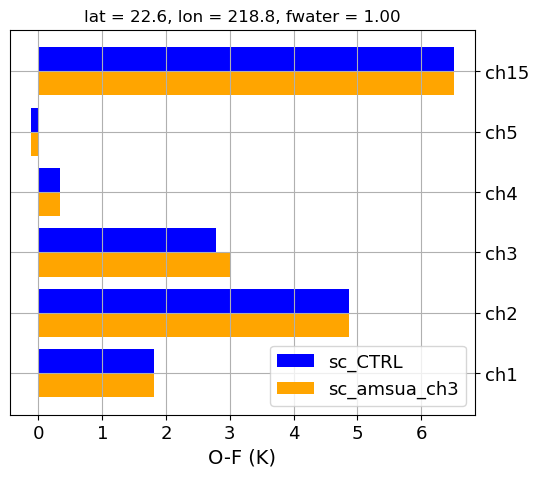

In [12]:
# Plot the background channel information 

fig, ax = plt.subplots(figsize=(6,5))

chs = ['ch1','ch2','ch3','ch4','ch5','ch15']

# Bar width
bar_height = 0.4

# Plot the bars
ax.barh([x + bar_height/2 for x in range(len(chs))], omf_ges[expref],  height=bar_height, label=f'{expref}', color='blue')
ax.barh([x - bar_height/2 for x in range(len(chs))], omf_ges[exptest], height=bar_height, label=f'{exptest}', color='orange')

#ax.barh([x + bar_height/2 for x in range(len(chs))], omfnorm_ges[expref],  height=bar_height, label=f'{expref}', color='blue')
#ax.barh([x - bar_height/2 for x in range(len(chs))], omfnorm_ges[exptest], height=bar_height, label=f'{exptest}', color='orange')

#ax.barh(chs, omfnorm_ges[exptest]-omfnorm_ges[expref],  height=bar_height, label=f'{exptest}-{expref}', color='blue')

ax.set_xlabel(r'O-F (K)', fontsize=14)
ax.set_yticks([r for r in range(len(chs))], chs, fontsize=14)
ax.yaxis.tick_right()
ax.tick_params(axis='both', which='major', labelsize=13)

ax.grid(True)
ax.legend(fontsize=13)
ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

Text(0.5, 1.0, 'lat = 22.6, lon = 218.8, fwater = 1.00')

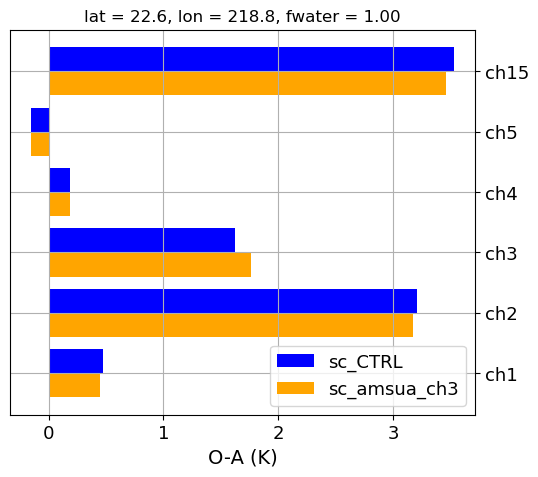

In [13]:
# Plot the analysis channel information 

fig, ax = plt.subplots(figsize=(6,5))

chs = ['ch1','ch2','ch3','ch4','ch5','ch15']

# Bar width
bar_height = 0.4

# Plot the bars
ax.barh([x + bar_height/2 for x in range(len(chs))], omf_anl[expref],  height=bar_height, label=f'{expref}', color='blue')
ax.barh([x - bar_height/2 for x in range(len(chs))], omf_anl[exptest], height=bar_height, label=f'{exptest}', color='orange')

ax.set_xlabel('O-A (K)', fontsize=14)
ax.set_yticks([r for r in range(len(chs))], chs, fontsize=14)
ax.yaxis.tick_right()
ax.tick_params(axis='both', which='major', labelsize=13)

ax.grid(True)
ax.legend(fontsize=13)
ax.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

In [ ]:
# figure size:
fig = plt.figure(figsize=(14,4))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: model profile 
ax1.plot(qv_anl[exptest] - qv_anl[expref], pres, color='blue', label=rf'$\Delta q_v$')
ax1.axvline(x=0, color='black', linestyle=':', linewidth=2)
ax1.set_ylim(1000,0)
#ax.set_xlabel(r'$ \partial T_B / \partial T$  [K/K]', fontsize=14)
ax1.set_ylabel('pressure  [hPa]', fontsize=14)
ax1.grid(True)
ax1.legend()
ax1.set_title(f'lat = {lat:.1f}, lon = {lon:.1f}, fwater = {fwater:.2f}')

# ax2: amsua channels
contour2 = ax2.pcolormesh(lats, levs, (clwz[exptest][tt] - clwz[expref][tt])*1e6, cmap='RdBu_r', vmin=vmin_abs, vmax=vmax_abs)
ax2.invert_yaxis()
ax2.plot(np.ma.array(lats, mask=s95_clw[exptest][tt]!=False), levs, 'k+', ms=2.5)
ax2.set_xlabel('latitude')
ax2.set_xticks([-90,-60,-30,0,30,60,90])
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'CLW (t={tt}h) ({exptest} - {expref})')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('CLW (1e-3*g/kg)')   

if save_fig:
    plt.savefig(f"{fig_dir}/CLW_drmse_and_expdiff_t{tt}{region}_{exptest}_ref_{expref}.png")
plt.show()